In [6]:

# Bias Variance Tradeoff
# In this notebook we investigate the bias and variance of models. In the first section we'll investigate fitting functions of the form:
# $$f(x) = a + b * x^n$$
# to some cubic data with noise.
# In [ ]:

% matplotlib inline
from __future__ import print_function
import random

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

# from sklearn import datasets, linear_model
import statsmodels.api as sm

In [9]:
def polynomials(X, degree=1):
    # See also numpy.vander
    array = [X]
    y = X
    for i in range(2, int(degree + 1)):
        y = y * X
        array.append(y)
    return np.array(array).transpose()



In [11]:
X = np.array(range(3))
# polynomials(X, 3)

In [12]:
polynomials(X, 10)

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   1,    1,    1,    1,    1,    1,    1,    1,    1,    1],
       [   2,    4,    8,   16,   32,   64,  128,  256,  512, 1024]])

In [13]:
def monomials(X, degree=1):
    y = np.array(X)
    y = np.power(X, degree)
    return np.array([y]).transpose()



In [15]:
monomials(X, 3)

array([[0],
       [1],
       [8]])

In [17]:
def generate_data(func, a, b, n=100):
    data = []
    for _ in range(n):
        x = random.random() * (b - a)
        y = func(x)
        data.append((x, y))
    return list(sorted(data))

In [23]:
mu, sigma = 0, 0.1 # mean and standard deviation
# norm = np.random.normal(mu, sigma)

# Generate some data
f = lambda x: 4 + 5 * x - 3 * x*x + 0.1 * x * x * x + np.random.normal(mu, sigma)
data = generate_data(f, 0, 2, n=20)
data

[(0.18173022773516845, 4.7517805223605345),
 (0.44452813480657927, 5.5500833606122315),
 (0.51577526331232, 5.814590009695601),
 (0.5363762398540737, 5.969965664110437),
 (0.5385807369718403, 5.80094036288006),
 (0.5620560591774901, 5.956284775269423),
 (0.6008879949811268, 5.873350929743917),
 (0.6772788651415509, 5.989956227686124),
 (0.8317491181073409, 6.131440016414837),
 (1.0024091345619663, 5.900280380152262),
 (1.0305737865520634, 6.134814893618218),
 (1.3218546089796128, 5.6736078435033725),
 (1.3780907504118742, 5.442108935586376),
 (1.389392232886649, 5.474017760078393),
 (1.4437265953917895, 5.375855483337946),
 (1.6210060811742724, 4.869008784648153),
 (1.6829253395730868, 4.438570570646131),
 (1.7537672913047488, 3.9827255888623063),
 (1.7573293279930815, 3.8935457382794914),
 (1.9162811946234581, 3.228561249258563)]

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     45.42
Date:                Wed, 12 Oct 2016   Prob (F-statistic):           1.94e-06
Time:                        10:45:08   Log-Likelihood:                -49.806
No. Observations:                  20   AIC:                             101.6
Df Residuals:                      19   BIC:                             102.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             3.8197      0.567      6.739      0.0

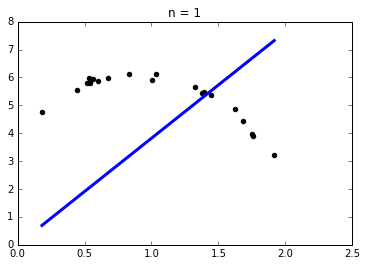

In [26]:
# Fitting Polynomial Functions
# Here we fit try to fit our sample data with an increasing exponent:
# $$f(x) = 1 + b x^n$$
# None of these models are quite right because the data is generate from the function
# $$ \hat{f}(x) = 4 + 5 x - 3 x^2 + 0.1 x^3$$
# So each model is not quite right because one or more terms is missing. This will allow us to take a closer look at the bias-variance tradeoff.
# Let's start with $n = 1, 2, 3, 4$.
# In [ ]:
domain = np.array([x[0] for x in data])
Y = np.array([x[1] for x in data])

for i in range(1, 2):
    X = monomials(domain, i)
    # Create linear regression object
    regr = sm.OLS(Y, X).fit()

    yhat = regr.predict(X)
    sse = np.mean((np.mean(yhat) - Y) ** 2)
    var = np.var(yhat)
    bias = sse - var - 0.01
    
    print(regr.summary())

    # The mean square error
    print("Residual sum of squares: %.2f" % sse)

    print("Bias: {bias}".format(bias=bias))
    print("Variance: {var}".format(var=var))
        
    # Plot outputs
    plt.scatter(domain, Y,  color='black')
    plt.plot(domain, regr.predict(X), color='blue', linewidth=3)

    plt.title("n = " + str(i))

    plt.show()

In [67]:
for degree in range(1, 7):
    # Generate some data
    f = lambda x: 1 - 2 * x + 3 * x ** degree + np.random.normal(mu, sigma)
    data = generate_data(f, 0, 2, n=20)

    domain = np.array([x[0] for x in data])
    Y = np.array([x[1] for x in data])

    X = np.array([domain]).transpose()
    # Create linear regression object

    # Compute the errors

    # Plot outputs

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     64.81
Date:                Wed, 12 Oct 2016   Prob (F-statistic):           1.53e-07
Time:                        11:17:24   Log-Likelihood:                -98.028
No. Observations:                  20   AIC:                             198.1
Df Residuals:                      19   BIC:                             199.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            44.5016      5.528      8.050      0.0

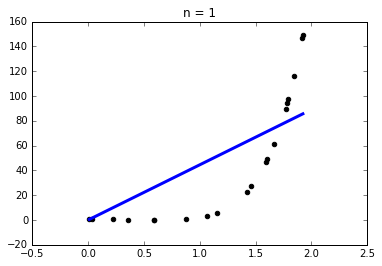

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     196.9
Date:                Wed, 12 Oct 2016   Prob (F-statistic):           5.83e-13
Time:                        11:17:24   Log-Likelihood:                -81.568
No. Observations:                  20   AIC:                             167.1
Df Residuals:                      18   BIC:                             169.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1           -73.9651     13.873     -5.331      0.0

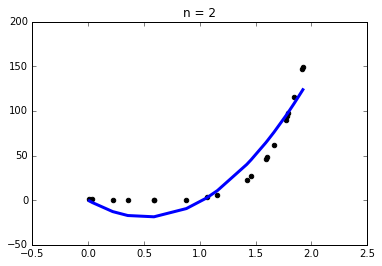

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     1735.
Date:                Wed, 12 Oct 2016   Prob (F-statistic):           2.47e-21
Time:                        11:17:24   Log-Likelihood:                -55.596
No. Observations:                  20   AIC:                             117.2
Df Residuals:                      17   BIC:                             120.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            54.9679      9.689      5.673      0.0

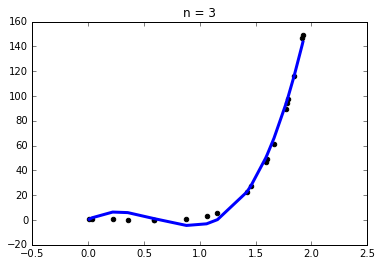

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.723e+04
Date:                Wed, 12 Oct 2016   Prob (F-statistic):           1.95e-30
Time:                        11:17:24   Log-Likelihood:                -24.611
No. Observations:                  20   AIC:                             57.22
Df Residuals:                      16   BIC:                             61.20
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1           -15.7021      4.387     -3.579      0.0

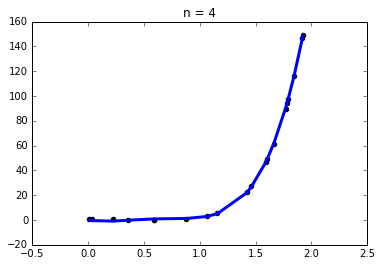

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.078e+05
Date:                Wed, 12 Oct 2016   Prob (F-statistic):           9.64e-36
Time:                        11:17:24   Log-Likelihood:                -1.4092
No. Observations:                  20   AIC:                             12.82
Df Residuals:                      15   BIC:                             17.80
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            10.4016      2.640      3.941      0.0

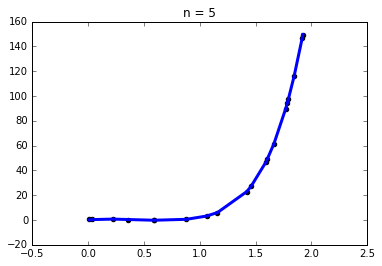

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.631e+05
Date:                Wed, 12 Oct 2016   Prob (F-statistic):           4.41e-33
Time:                        11:17:25   Log-Likelihood:                -1.3180
No. Observations:                  20   AIC:                             14.64
Df Residuals:                      14   BIC:                             20.61
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            11.6006      4.314      2.689      0.0

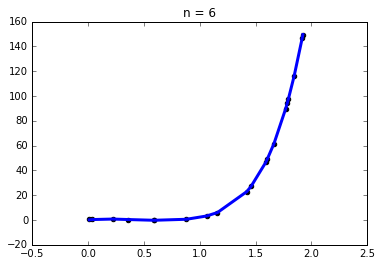

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.833e+05
Date:                Wed, 12 Oct 2016   Prob (F-statistic):           2.01e-31
Time:                        11:17:25   Log-Likelihood:                 2.1299
No. Observations:                  20   AIC:                             9.740
Df Residuals:                      13   BIC:                             16.71
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            23.6919      6.443      3.677      0.0

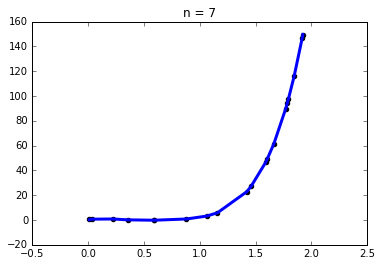

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.018e+05
Date:                Wed, 12 Oct 2016   Prob (F-statistic):           1.42e-29
Time:                        11:17:25   Log-Likelihood:                 5.2259
No. Observations:                  20   AIC:                             5.548
Df Residuals:                      12   BIC:                             13.51
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            34.1173      7.613      4.481      0.0

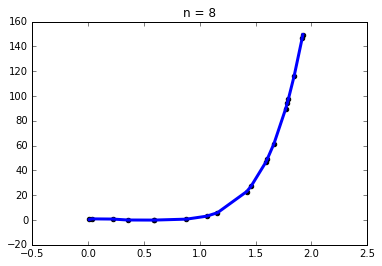

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.943e+05
Date:                Wed, 12 Oct 2016   Prob (F-statistic):           2.68e-27
Time:                        11:17:25   Log-Likelihood:                 6.8943
No. Observations:                  20   AIC:                             4.211
Df Residuals:                      11   BIC:                             13.17
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            40.3752      8.551      4.722      0.0

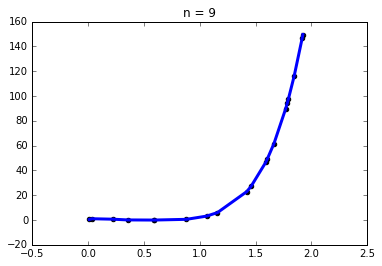

In [69]:


for i in range(1, 10):
    X = polynomials(domain, i)
    # Create linear regression object
    regr = sm.OLS(Y, X).fit()

    yhat = regr.predict(X)
    sse = np.mean((np.mean(yhat) - Y) ** 2)
    var = np.var(yhat)
    bias = sse - var - 0.01
    
    # The coefficients
    print(regr.summary())

    # The mean square error
    print("Residual sum of squares: %.2f" % sse)

    print("Bias: {bias}".format(bias=bias))
    print("Variance: {var}".format(var=var))
        
    # Plot outputs
    plt.scatter(domain, Y,  color='black')
    plt.plot(domain, regr.predict(X), color='blue', linewidth=3)

    plt.title("n = " + str(i))

    plt.show()